# Machine Learning Programming Exercise 6: Support Vector Machines

In [1]:
#import package(s)
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio 
from sklearn import svm 
import warnings
warnings.filterwarnings('ignore')

## 1 Support Vector Machines
In the ﬁrst half of this exercise, support vector machines (SVMs) will be used with various example 2D datasets. Experimenting with these datasets will help gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs. 

SVMs are sometimes more powerful way of learning complex non-linear functions compared to both logistic regression and neural networks. They have computational advantages by usng two line segments that closely approximates the cost function used by logistic regression. As shown in the illustration, $cost_1 (\theta^T x^{(i)})$ and $cost_0 (\theta^T x^{(i)})$ are close to zero for certain values of $\theta^T x^{(i)}.$

Image source: Image from Andrew Ng's Machine Learning course on Coursera used for illustration.
![altlogregcost.png](altlogregcost.png)

### 1.1 Visualizing example dataset 1
In this dataset, the positions of the positive examples (indicated with $+$) and the negative examples (indicated with $o$) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example $+$ on the far left at about $(0.1,4.1)$, which will affect the the SVM decision boundary.

Informally, the $C$ parameter is a positive value that controls the penalty for misclassiﬁed training examples. A large $C$ parameter tells the SVM to try to classify all the examples correctly. $C$ plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter used previously for logistic regression to keep the parameter values small.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    SVM makes a prediction of $y$ being zero or one based on the criteria for $\theta^T x^{(i)}$. The SVM hypothesis is
    $h_{\theta} (x) = \begin{cases} 1 \quad \text{if} \> \theta^T x^{(i)} \geq 0 \\ 0 \quad \text{otherwise} \end{cases}.$
    
   The cost function is given by 
    $\begin{align*} J({\theta}) = C \sum_{i=1}^m \left [ y^{(i)} cost_1 (\theta^T x^{(i)}) + (1-y^{(i)}) cost_0 (\theta^T x^{(i)})\right] + \frac{1}{2} \sum_{j=1}^n \theta_j^2 \end{align*}$ where $\begin{align*} cost_1 (\theta^T x^{(i)})  = - \log \left ( \frac{1}{1 + e^{-\theta^T x^{(i)}}} \right)\end{align*}$ and $\begin{align*} cost_0 (\theta^T x^{(i)})  = - \log \left (1- \frac{1}{1 + e^{-\theta^T x^{(i)}}} \right)\end{align*}$.

</div>

Loading and Visualizing Data ...



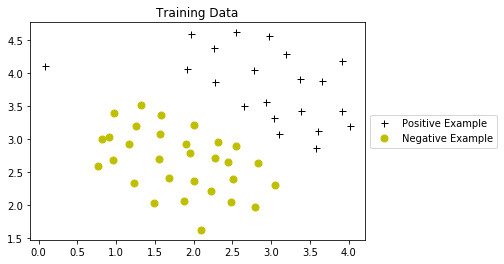

In [2]:
#define function for exercise(s)
def plotData(x, y, lab):
#PLOTDATA Plots the data points X and y into a new figure 
#   PLOTDATA(x,y) plots the data points with + for the positive examples
#   and o for the negative examples. X is assumed to be a Mx2 matrix.
#
# Note: This was slightly modified such that it expects y = 1 or y = 0

    #reshape y to be a 1D array
    y = y.ravel()
    
    pos = y==1
    neg = y==0
    plt.figure()
    plt.plot(x[pos,0], x[pos,1], 'k+', markersize=7, label=lab[0])
    plt.plot(x[neg,0], x[neg,1], 'yo', markersize=7, label=lab[1])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

# =============== Part 1: Loading and Visualizing Data ================
#  We start the exercise by first loading and visualizing the dataset. 
#  The following code will load the dataset into your environment and plot
#  the data.

#Load Training Data
print('Loading and Visualizing Data ...\n')

#Load from ex6data1: 
# You will have X, y in your environment
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y']

#Plot training data
plotlabels = ['Positive Example', 'Negative Example']
plotData(X,y,plotlabels)
plt.title('Training Data')
plt.show()

<div class="alert alert-block alert-info">
<b>Implementation Note:</b> 
    So when passing the training data to the SVM software, there is no need to add this extra feature $x_0 = 1$ yourself. In particular, the code should be working with training examples $x \in \mathbb{R}^n$ (rather than $x \in \mathbb{R}^{n+1}$ ); for example, in the ﬁrst example dataset $x \in \mathbb{R}^2$.

</div>


Training Linear SVM ...



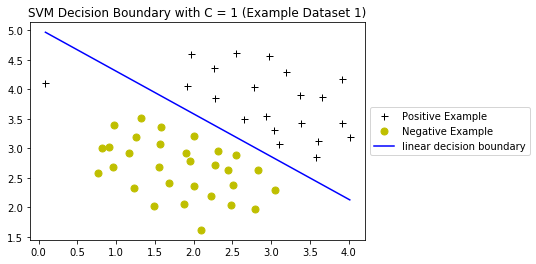

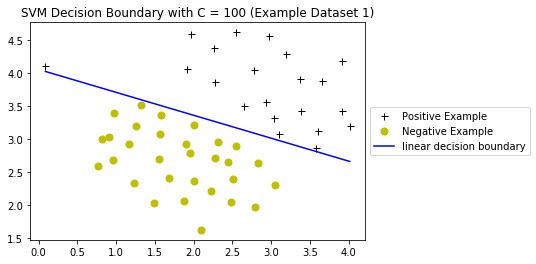

In [3]:
#define function for exercise(s)
def visualizeBoundaryLinear(X, y, model, label):
#VISUALIZEBOUNDARYLINEAR plots a linear decision boundary learned by the
#SVM
#   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a linear decision boundary 
#   learned by the SVM and overlays the data on it

    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(min(X[:,0]), max(X[:,0]), 100)
    yp = -(w[0]*xp + b)/float(w[1])
    plotData(X, y, label)
    plt.plot(xp, yp, '-b', label='linear decision boundary')

# ==================== Part 2: Training Linear SVM ====================
#  The following code will train a linear SVM on the dataset and plot the
#  decision boundary learned.

print('\nTraining Linear SVM ...\n')

#You should try to change the C value below and see how the decision
#boundary varies (e.g., try C = 1000)
C=np.array([[1,100]])
    
for i in range(C.shape[1]):
    model = (svm.LinearSVC(C=C[0,i], loss='hinge', tol=0.001, max_iter=1000)).fit(X,y.ravel())
    
    plotlabels = ['Positive Example', 'Negative Example']
    visualizeBoundaryLinear(X, y, model, plotlabels)
    plt.title('SVM Decision Boundary with C = %s (Example Dataset 1)' % C[0,i])
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
    plt.show()


When $C = 1$,the SVM puts the decision boundary in the gap between the two datasets and misclassiﬁes the data point on the far left.

When $C = 100$, the SVM now classiﬁes every single example correctly, but has a decision boundary that does not appear to be a natural ﬁt for the data. 

**Large Margin Intuiton**

SVMs are known as large margin classiﬁers. That is, it tries to separate data with a large margin. This margin creates a decision boundary that is a large minimum distance from any of the training examples. See illustration of a large margin using a line to separate positive and negative examples.

Image source: Image from Andrew Ng's Machine Learning course on Coursera used for illustration.
![svmlinedb.png](svmlinedb.png)

The decision boundary takes advantage of a built-in safety factor that SVMs use to minimize the cost function. It requires $\theta^T x \geq 1$, not just $\theta^T x \geq 0$, when predicting $y=1$. Conversely, $\theta^T x \leq -1$, not just $\theta^T x < 0$, when predicting $y=0$.

Though, a large margin classifier like SVMs can cause learning algorithms can be sensitive to outliers. Choosing a $C$ that is not too large can help it ignore a few outliers.

<div class="alert alert-block alert-info">
<b>Note:</b> 
    The mathematics for large margin classification involves projecting each training example $x^{(i)}$ onto the parameter vector $\theta$. The projection for each training example $i$ are called $p^{(i)}$. Here, the SVM is focused on optimizing the objective function by minimizing the squared norm of the parameter vector $\theta$:
   $\begin{align*} \min_{\theta} \frac{1}{2} \sum_{j=1}^n \theta_j^2 = \min_{\theta} \frac{1}{2} \| \theta \|^2 \end{align*}$ such that \begin{cases} \theta^T x^{(i)} = p^{(i)} \cdot \| \theta \| \geq 1 \quad \text{if} \> y^{(i)} =1 \\ \theta^T x^{(i)} = p^{(i)} \cdot \| \theta \| \leq -1 \quad \text{if} \> y^{(i)} =0 \end{cases}

These constraints creates a large margin because the lengths of the projections are maximized, causing a large distance between the training examples and decsion boundary, while the keeping norm of the theta parameters small.
</div>

### 1.2 SVM with Gaussian Kernels
In this part of the exercise, SVMs will be used for non-linear classiﬁcation. In particular, thse SVMs uses Gaussian kernels on datasets that are not linearly separable.

#### 1.2.1 Gaussian Kernel
To ﬁnd non-linear decision boundaries with the SVM, a Gaussian kernel needs to be implemented first. Think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples, $(x^{(i)}, x^{(j)}).$ The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to $0$) as the examples are further apart. 

The Gaussian kernel function is deﬁned as $\begin{align*} K_{gaussian} (x^{(i)}, x^{(j)}) = \exp \left( - \frac{\| x^{(i)} - x^{(j)} \|^2}{2 \sigma^2} \right) = \exp \left( - \frac{ \sum_{k=1}^n (x_k^{(i)} - x_k^{(j)})^2}{2 \sigma^2}. \right) \end{align*}$ Test the kernel function on two provided examples to get an expected value of $0.324652.$

<div class="alert alert-block alert-info">
<b>Note:</b> 
    SVMs use kernels to develop complex nonlinear classiﬁers. They are used to define new features using landmarks and similarity functions. The similarity function measures how close a example $(x^{(i)}, y^{(i)})$ is to a landmark (the location of each training example from the dataset, $x^{(i)}$): one if they are close to each other or zero if they are far away from each other. The illustration below shows how the feature vector $f^{(i)}$ is created:
    
  Image source: Image from Andrew Ng's Machine Learning course on Coursera used for illustration.
    ![ftvec.png](ftvec.png)
    
  When using a kernel with an SVM, the hypothesis function now is to predict
  \begin{cases} y=1 \quad \text{if} \> \theta^T f \geq 0 \\ 0 \quad \text{otherwise} \end{cases}
    where the features $f \in \mathbb{R}^{m+1}$ are computed using $x$.
   The parameters $\theta$ are obtained by solving the minimization problem:
    $\begin{align*} \min_{\theta} C \sum_{i=1}^m \left [ y^{(i)} cost_1 (\theta^T f^{(i)}) + (1-y^{(i)}) cost_0 (\theta^T f^{(i)})\right] + \frac{1}{2} \sum_{j=1}^m \theta_j^2. \end{align*}$. If $\Theta_0$ is ignored, then the problem becomes
    $\begin{align*} \min_{\theta} C \sum_{i=1}^m \left [ y^{(i)} cost_1 (\theta^T f^{(i)}) + (1-y^{(i)}) cost_0 (\theta^T f^{(i)})\right] + \Theta^T \Theta. \end{align*}$ This implementation allows the SVM to run much more eﬃciently.

    
   There are other kernels like polynomial, string, chi-square, etc., but linear (no kernel) and Gaussian are most common to use. 
</div>

In [4]:
#define function for exercise(s)
def gaussianKernel(x1, x2, sigma):
#   RBFKERNEL returns a radial basis function kernel between x1 and x2
#   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
#   and returns the value in sim

    return np.exp(-(np.sum((x1 - x2) ** 2) / float(2 * (sigma ** 2))))

# =============== Part 3: Implementing Gaussian Kernel ===============
#  You will now implement the Gaussian kernel to use
#  with the SVM. You should complete the code in gaussianKernel.m

print('\nEvaluating the Gaussian Kernel ...\n')
sigma = 2
x1 = np.array([1, 2, 1])  
x2 = np.array([0, 4, -1]) 
sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %s: %s' % (sigma, sim))
print('(for sigma = 2, this value should be about 0.324652)\n')


Evaluating the Gaussian Kernel ...

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2: 0.32465246735834974
(for sigma = 2, this value should be about 0.324652)



#### 1.2.2 Example Dataset 2
For this dataset, observe that there is no linear decision boundary that separates the positive and negative examples. However, by using the Gaussian kernel with the SVM, the algorithm will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset. 

Loading and Visualizing Data ...



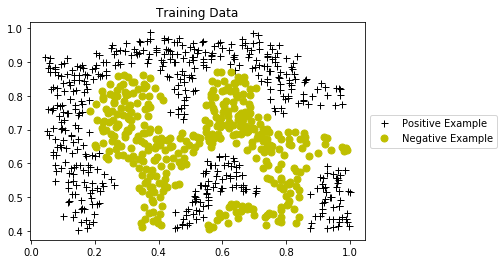

In [5]:
# =============== Part 4: Visualizing Dataset 2 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 

#Load Training Data
print ('Loading and Visualizing Data ...\n')

#Load from ex6data1: 
#You will have X, y in your environment
data = sio.loadmat('ex6data2.mat')
X = data['X']
y = data['y']

#Plot training data
plotlabels = ['Positive Example', 'Negative Example']
plotData(X,y,plotlabels)
plt.title('Training Data')
plt.show()


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...



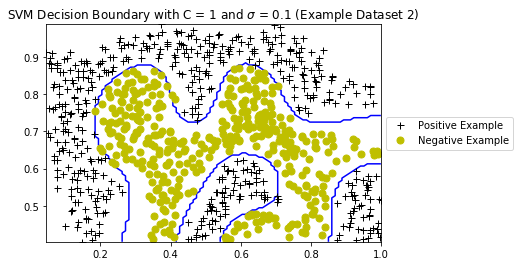

In [6]:
#define function for exercise(s)
def visualizeBoundary(X, y, model, lab):
#VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
#   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
#   boundary learned by the SVM and overlays the data on it
        
    #Plot the training data on top of the boundary
    plotData(X, y, lab)
    
    #Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), 100)
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros((X1.shape))
    
    for i in range(0,X1.shape[1]):
        this_X = np.column_stack((X1[:,i], X2[:,i]))
        vals[:,i] = model.predict(this_X)
        
    plt.contour(X1, X2, vals, levels=[0.5], colors='b')

# ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
#  After you have implemented the kernel, we can now use it to train the 
#  SVM classifier.

print('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n')

#We set the tolerance and max_passes lower here so that the code will run
#faster. However, in practice, you will want to run the training to
#convergence.

# SVM Parameters
C = 1 
sigma = 0.1

#svmddata2 = svm.SVC(C=C, kernel='rbf', gamma = 1/float(2*(sigma**2))) 
model = (svm.SVC(C=C, kernel='rbf', gamma = 1/float(2*(sigma**2)))).fit(X,y.ravel())

plotlabels = ['Positive Example', 'Negative Example']
visualizeBoundary(X, y, model, plotlabels)
plt.title(r'SVM Decision Boundary with C = %s and $\sigma$ = %s (Example Dataset 2)' %(C, sigma))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

For dataset 2, the decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well.

#### 1.2.3 Example Dataset 3
Use the cross validation set $Xval, yval$ to determine the best $C$ and $\sigma$ parameter to use. For both $C$ and $\sigma$, it is suggested to try values in multiplicative steps (e.g., $0.01,0.03,0.1,0.3,1,3,10,30$). By trying each of the $8$ values listed above for $C$ and $\sigma^2$, it ends up training and evaluating (on the cross validation set) a total of $8^2 = 64$ diﬀerent models.

Loading and Visualizing Data ...



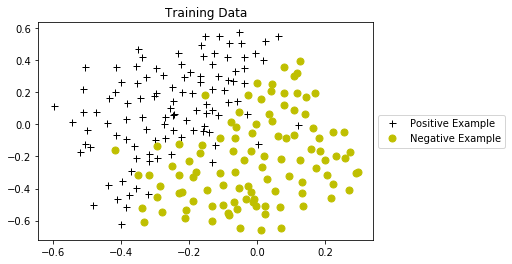

In [7]:
# =============== Part 6: Visualizing Dataset 3 ================
#  The following code will load the next dataset into your environment and 
#  plot the data. 

#Load Training Data
print('Loading and Visualizing Data ...\n')

#Load from ex6data1: 
# You will have X, y in your environment
data = sio.loadmat('ex6data3.mat')
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']

#Plot training data
plotlabels = ['Positive Example', 'Negative Example']
plotData(X,y,plotlabels)
plt.title('Training Data')
plt.show()

<div class="alert alert-block alert-info">
<b>Implementation Note:</b> 
    When implementing cross validation to select the best $C$ and $\sigma$ parameter to use, evaluate the error on the cross validation set. Recall that for classiﬁcation, the error is deﬁned as the fraction of the cross validation examples that were classiﬁed incorrectly. Then, generate the predictions for the cross validation set.
</div>

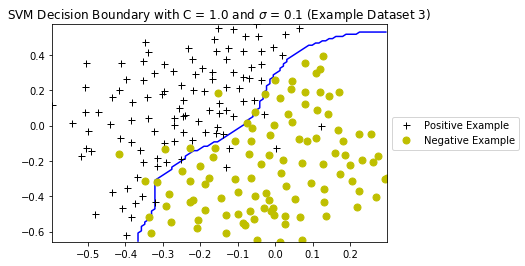

In [8]:
#define function for exercise(s)
def dataset3Params(X, y, Xval, yval):
#DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
#where you select the optimal (C, sigma) learning parameters to use for SVM
#with RBF kernel
#   [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
#   sigma. You should complete this function to return the optimal C and 
#   sigma based on a cross-validation set    
    
    #You need to return the following variables correctly.
    #C = 1
    #sigma = 0.3
    C = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    sigma = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    
    m = len(C)
    n = len(sigma)
    pred_err = np.zeros((m,n))
    
    for i in range(m):
        for j in range(n):
            model = (svm.SVC(C=C[i], kernel='rbf', gamma = 1/float(2*(sigma[j]**2)))).fit(X,y.ravel())
            pred = model.predict(Xval)
            pred_err[i,j] = np.mean(np.equal(pred.reshape(-1,1), yval))
    
    C_maxind,sigma_maxind = divmod(pred_err.argmax(), pred_err.shape[1])
    #return the optimal values of C and sigma
    return C[C_maxind], sigma[sigma_maxind]

# ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========
#  This is a different dataset that you can use to experiment with. Try
#  different values of C and sigma here.

#Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

#Train the SVM
model = (svm.SVC(C=C, kernel='rbf', gamma = 1/float(2*(sigma**2)))).fit(X,y.ravel())

plotlabels = ['Positive Example', 'Negative Example']
visualizeBoundary(X, y, model, plotlabels)
plt.title(r'SVM Decision Boundary with C = %s and $\sigma$ = %s (Example Dataset 3)' %(C, sigma))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()